<div style="text-align: right">Bjanka Bašić, travanj 2019.</div>

# <div style="color:purple; text-align: center;"> VJEROJATNOST </div>

In [71]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

from scipy import stats
from IPython.display import display
from IPython.display import Image

## <span style="color:purple"> 0. Uvod </span>

1814.godine Pierre-Simon Laplace je definirao vjerojatnost kao:

>*Vjerojatnost je... dakle, jednostavno razlomak čiji je brojnik broj povoljnih slučajeva i čiji je nazivnik broj mogućih slučajeva ... kada nas ništa ne navodi na očekivanje da se bilo koji od ovih slučajeva dogodi više puta nego bilo koji drugi.*

![Laplace](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG/180px-AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG)
<center><a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace">Pierre-Simon Laplace</a></center>


To je zapravo vrlo dobra definicija **vjerojatnosti**, još samo trebamo precizno odrediti što su slučajevi za određeni eksperiment te naravno što su povoljni slučajevi. Definirajmo:


- **Pokus:**
  Pojava s neizvjesnim ishodom koju možemo promatrati.
  <br>*Primjer: bacanje igraće kocke*
 
 
- **Ishod:**
  Rezultat pokusa. Nazivaju se i elementarni događaji.
  <br>*Primjer:* `3`


- **Prostor elementarnih događaja:**
  Skup svih ishoda nekog pokusa. 
  <br>*Primjer:* $ \Omega $ = `{1, 2, 3, 4, 5, 6}`


- **Događaj:**
  Podskup prostora elementarnih događaja koji imaju neko zajedničko svojstvo.
  <br>*Primjer:* `A={pao je paran broj}={2, 4, 6}`


- **Vjerojatnost:**
  Funkcija definirana na događajima.  Vjetojatnost će uvijek biti broj između 0 (nemogući događaj) te 1 (siguran događaj).
  <br>*Primjer, vjerojatnost događaja A je:* 
  $$ P(A)=\frac{\#A}{\#\Omega} = \frac{3}{6} = \frac{1}{2} $$
  
  Još jedan klasičan primjer pokusa je:

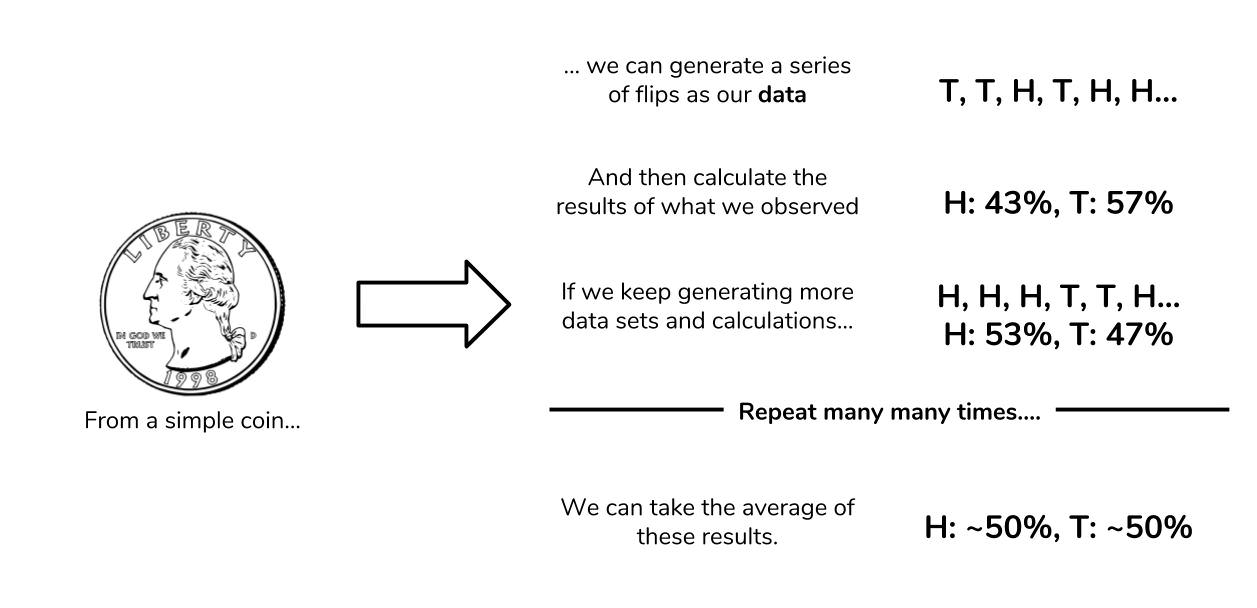

In [70]:
try:
    display(Image(filename = 'Primjer_pokusa.jpg', width = 600))
except FileNotFoundError:
    display(Image(url = 'https://i.imgur.com/GtbawRt.jpg'
                        'Primjer_pokusa.jpg', width = 600))

### <span style="color:purple"> Primjer: računanje vjerojatnosti korištenjem Pythona </span>

Koristeći definiciju koju je dao Laplace možemo jednostavno implementirati vjerojatnost pomoću Pythona.

In [27]:
from fractions import Fraction

def P(A, omega):
    return Fraction( len( A & omega ), len( omega ))

Probajmo sada ovu funkciju na primjeru pokusa bacanja igraće kocke sa šest strana. Kolika je vjerojatnost da je pri bacanju kocke pao paran broj?
Definirajmo prostor uzorka $ \Omega $ i događaj A pa izračunajmo vjerojatnost:

In [28]:
omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}

P(A, omega)

Fraction(1, 2)

No, ova funkcija je ograničena samo za računanje vjerojatnosti kada imamo skupove koji reprezentiraju događaje. Probajmo poboljšati funkciju tako da je događaj A zapravo predikat (npr.biti paran u ovom slučaju):

### <span style="color:purple"> Primjer: unaprijeđenje funkcije vjerojatnosti </span>

In [29]:
def P(A, omega): 
    if callable(A):
        A = zadovoljava(A, omega)
    return len( A & omega )/len( omega )

def zadovoljava(predikat, skup):
    return {a for a in skup if predikat(a)}

In [30]:
omega = {i for i in range(1,7)}
def A(x):
    return x%2==0

P(A,omega)

0.5

## <span style="color:purple"> 1. Vjerojatnost </span>

Neke osnovne tvrdnje koje ćemo koristiti:

* Uvjetna vjerojatnost:
$$
    P(B|A) = \frac{P(AB)}{P(A)} 
$$


* **Bayesovo pravilo**
$$
P(B_i|A) = \frac{P(A|B_i)P(B_i)}{P(A)}
= \frac{P(A|B_i)P(B_i)}{\sum_j P(AB_j)}
= \frac{P(A|B_i)P(B_i)}{\sum_j P(A|B_j)P(B_j)}
$$


* **Pravilo lanca**
$$P(A,B,C) = P(A) P(B|A) P(C|A,B)$$


   Poopćeno:
$$
\begin{align*}
P(X_1,\dots,X_n) &=
P(X_1)P(X_2|X_1)P(X_3|X_1,X_2)\cdots P(X_n|X_1,\dots,X_{n-1})\\
&= \prod_{k=1}^n P(X_k|X_1,\dots,X_{k-1})
\end{align*}
$$


### <span style="color:purple"> Slučajne varijable </span>

* $X$ je slučajna varijabla


* **Diskretna slučajna varijabla**: $\{x_i\}$ su njezine vrijednosti i ima ih najviše prebrojivo, a njena vjerojatnosna funkcija gustoće i funkcija distribucije respektivno:
$$
\begin{align*}
f(x) & = P(X = x) \geq 0\\
F(x) & = P(X \leq x)
\end{align*}
$$
-----------------------------------------------------------------------------------------------------
* $(X,Y)$ je **slučajni vektor**


* Zajednička distribucija nad slučajnim vektorom $(X,Y)$: $$P(X=x,Y=y)\equiv P(x,y)$$


* **Pravilo zbroja**
$$P(x)=\sum_y P(x,y)$$
(Marginalna vjerojatnost varijable $X$)

-----------------------------------------------------------------------------------------------------
* **Neprekidna slučajna varijabla**: koristeći oznake kao i kod diskretne, za funkciju gustoće vjerojatnosti i funkciju distribucije:
$$
\begin{align*}
f(x) & \geq 0\\
F(x) = \int_{-\infty}^{x} f(x)\,\textrm{d}x &\Rightarrow \int_{-\infty}^{\infty} f(x)\,\textrm{d}x = 1\\
P(a\leq X\leq b) &= \int_a^b f(x)\,\mathrm{d}x
\end{align*}
$$

### <span style="color:purple"> Primjer: Bernoullijeva slučajna varijabla </span>

Imamo $X\sim B(1,p)$:
$$P(X=x)=
\begin{cases}
p, & \text{ako $x=1$}\\
1-p, & \text{inače}
\end{cases}
$$

Koristeći definiciju će biti: 
$$F(x)=
\begin{cases}
0, &  x<0 \\
1-p, & 0\leq x<1\\
1, & x\geq1
\end{cases}$$


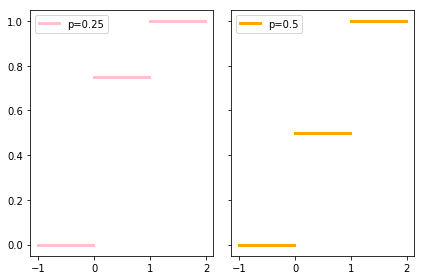

In [69]:
def F(x, p): 
    if(x<0): 
        return 0
    elif(x<1):
        return 1-p
    else:
        return 1
x1 = np.linspace(-1,0)[:-1]
x2 = np.linspace(0,1)[:-1]
x3 = np.linspace(1,2)[:-1]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.plot(x1,[F(i, 0.25) for i in x1], linewidth=3, color='pink')
ax1.plot(x2,[F(i, 0.25) for i in x2],linewidth=3, color='pink')
ax1.plot(x3,[F(i, 0.25) for i in x3],linewidth=3, color='pink')

ax2.plot(x1,[F(i, 0.5) for i in x1], linewidth=3, color='orange')
ax2.plot(x2,[F(i, 0.5) for i in x2],linewidth=3, color='orange')
ax2.plot(x3,[F(i, 0.5) for i in x3],linewidth=3, color='orange')

ax1.legend(['p=0.25'], loc='best')
ax2.legend(['p=0.5'], loc='best')

fig.tight_layout()
plt.show()